In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import takewhile
from PIL import ImageFont
from matplotlib.font_manager import findfont, FontProperties
from datetime import datetime
import locale

# Set locale to "it" to parse the month correctly
locale.setlocale(locale.LC_ALL, "it_IT.UTF-8")
plt.style.use('default')

# Importa dati dell'Istituto Superiore di Sanità
Questi dati sono ricavati dai bollettini settimanali dell'ISS. Vedi ad esempio https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_15-settembre-2021.pdf

In [2]:
df_assoluti = pd.read_csv('../dati/dati_ISS_complessivi.csv', sep=';')

df_assoluti

,data,non vaccinati,vaccinati completo,casi non vaccinati,casi vaccinati,ospedalizzati non vaccinati,ospedalizzati vaccinati,terapia intensiva non vaccinati,terapia intensiva vaccinati,decessi non vaccinati,decessi vaccinati
0,2021-09-29,11786620,37417795,70900,40060,6160,2418,717,174,927,565
1,2021-09-22,12581126,36332207,86133,44050,6782,2456,775,173,877,509
2,2021-09-15,13334156,35599815,96900,44990,6841,2331,786,163,770,405
3,2021-09-08,14507530,34292078,104890,43775,6579,2118,712,157,571,280
4,2021-09-01,15656647,32287644,107937,40380,5988,1788,641,127,383,187
5,2021-08-25,16708830,29628678,104405,33894,5162,1349,500,95,246,92
6,2021-08-18,17568325,26501452,95261,24978,4052,859,334,61,177,48
7,2021-08-11,20322716,22345659,80585,18887,3067,627,247,34,143,34
8,2021-08-04,21289761,19570464,60267,12333,2234,404,169,23,128,34
9,2021-07-28,22879167,17389604,40729,7277,1619,280,123,16,169,38


# Elaborazione dati
Calcola tassi di infezione, ospedalizzazione e decessi per vaccinati e non vaccinati

In [3]:
# ricava i tassi, dividendo per la popolazione vaccinati e non vaccinata
tassi = (7/30)*10**5*np.transpose([df_assoluti['casi non vaccinati']/df_assoluti['non vaccinati'],
         df_assoluti['casi vaccinati']/df_assoluti['vaccinati completo'],                  
         df_assoluti['ospedalizzati non vaccinati']/df_assoluti['non vaccinati'],
         df_assoluti['ospedalizzati vaccinati']/df_assoluti['vaccinati completo'],
         df_assoluti['terapia intensiva non vaccinati']/df_assoluti['non vaccinati'],
         df_assoluti['terapia intensiva vaccinati']/df_assoluti['vaccinati completo'],
         df_assoluti['decessi non vaccinati']/df_assoluti['non vaccinati'],
         df_assoluti['decessi vaccinati']/df_assoluti['vaccinati completo']])

df_tassi = pd.DataFrame(tassi)
df_tassi.columns = ['Casi, non vaccinati',
                    'Casi, vaccinati',
                    'Ospedalizzati, non vaccinati', 
                    'Ospedalizzati, vaccinati',
                    'In terapia intensiva, non vaccinati',
                    'In terapia intensiva, vaccinati',
                    'Deceduti, non vaccinati',
                    'Deceduti, vaccinati']

df_tassi.index = pd.to_datetime(df_assoluti['data'], format='%Y/%m/%d')

df_tassi

,"Casi, non vaccinati","Casi, vaccinati","Ospedalizzati, non vaccinati","Ospedalizzati, vaccinati","In terapia intensiva, non vaccinati","In terapia intensiva, vaccinati","Deceduti, non vaccinati","Deceduti, vaccinati"
data,,,,,,,,
2021-09-29,140.356891,24.980984,12.194618,1.507839,1.419406,0.108505,1.835132,0.352328
2021-09-22,159.744843,28.289868,12.578100,1.577297,1.437338,0.111104,1.626510,0.326891
2021-09-15,169.564538,29.487981,11.971011,1.527817,1.375415,0.106836,1.347417,0.265451
2021-09-08,168.700898,29.785791,10.581402,1.441149,1.145152,0.106827,0.918374,0.190520
2021-09-01,160.860113,29.181442,8.924005,1.292135,0.955292,0.091779,0.570791,0.135139
2021-08-25,145.798160,26.692382,7.208564,1.062372,0.698234,0.074815,0.343531,0.072452
2021-08-18,126.520694,21.992003,5.381655,0.756311,0.443601,0.053708,0.235082,0.042262
2021-08-11,92.522902,19.721802,3.521347,0.654713,0.283591,0.035503,0.164184,0.035503
2021-08-04,66.051939,14.704301,2.448438,0.481678,0.185222,0.027422,0.140287,0.040537


Calcola i numeri assoluti (medi, giornalieri) dell'epidemia

In [4]:
df_assoluti2 = df_assoluti.copy(deep=True)
df_assoluti2.index = pd.to_datetime(df_assoluti2['data'], format='%Y/%m/%d')
df_assoluti2.drop('data', axis=1, inplace=True)
# trasforma in numeri settimanali
df_assoluti2 = (1/30)*df_assoluti2

# Rappresentazione grafica dei risultati

### Funzioni per plot

In [5]:
def which_axe(x):
    axes[x].set_xlabel('')
    axes[x].set_xticks(x_date)
    axes[x].set_xticklabels(x_label)
    axes[x].legend(['Non vaccinati', 'Vaccinati'])
    axes[x].grid()
    axes[x].minorticks_off()

def watermark_specs(figure, watermark):
    # Get the default Matplotlib font
    default_font = findfont(FontProperties(family=['sans-serif']))
    
    # Fraction of the image where the Watermark is placed
    figure_fraction = 0.6
    
    # Get Figure width, height (Pixels)
    figure_wd = figure.get_figwidth() * figure.dpi
    figure_ht = figure.get_figheight() * figure.dpi

    # Get Watermark width (Pixels)
    watermark_wd = int(figure_fraction * figure_wd)

    # Calculate the scaled fontsize - iterate until the text size is larger than the text width and take the max value
    fontsize = max(takewhile(lambda i: ImageFont.truetype(default_font, i).getsize(watermark)[0] < watermark_wd, 
                    range(1, watermark_wd))) - 1
    # Calculate appropriate rotation and convert to degree (r * 180°/pi)
    angle = np.arctan(figure_ht/figure_wd)*(180/np.pi)

    # Multiply by -1 to flip text horizontally
    angle *= -1

    print(f"watermark fontsize: {fontsize}, angle:{round(angle, 2)}")
    return fontsize, angle

def add_watermark(figure, axis_font_size):
    watermark = 'github.com/apalladi/covid_monitoraggio_vaccini'
    # Get the scaled watermark fontsize and angle
    fontsize, angle = watermark_specs(figure, watermark)
    figure.text(0.5,
                0.5, 
                watermark,
                fontsize=fontsize, 
                color='gray', 
                alpha=0.25,
                ha='center', 
                va='center', 
                rotation=angle, 
                zorder=0
                )

    # explicit link and last update date at the bottom
    last_update = datetime.today().strftime('%d-%m-%Y %H:%M')
    watermark_btm = r'$\bf{Fonte:}$ https://github.com/apalladi/covid_vaccini_monitoraggio'
    watermark_btm += f'\n Ultimo aggiornamento: {last_update}'
    figure.text(0.5, 
                -0.06, 
                watermark_btm,
                fontsize=axis_font_size,
                color='darkslategray', 
                ha="center", 
                va="bottom"
                )

def update_labels():
    # aggiungi nuovo mese/anno se necessario
    if (df_tassi.index[0].month > df_tassi.index[1].month):
        # aggiorna lista x_date
        date_to_add = df_tassi.index[0].replace(day=1)
        x_date.append(date_to_add.strftime('%Y-%m-%d'))
        # aggiorna lista x_label
        month_abbr = date_to_add.strftime("%b").capitalize()
        year_abbr = date_to_add.strftime("%y").capitalize()
        # specifica nuovo anno se necessario
        if (df_tassi.index[0].year > df_tassi.index[1].year):
            x_label.append(f'{month_abbr}\n{year_abbr}')
            print(f'Aggiunto nuovo mese {month_abbr} e anno {year_abbr}')
        # altrimenti aggiungi solo il mese
        else:
            x_label.append(month_abbr)
            print(f'Aggiunto nuovo mese {month_abbr}')


### Tassi di infezione, ricovero, decesso

watermark fontsize: 21, angle:-45.0


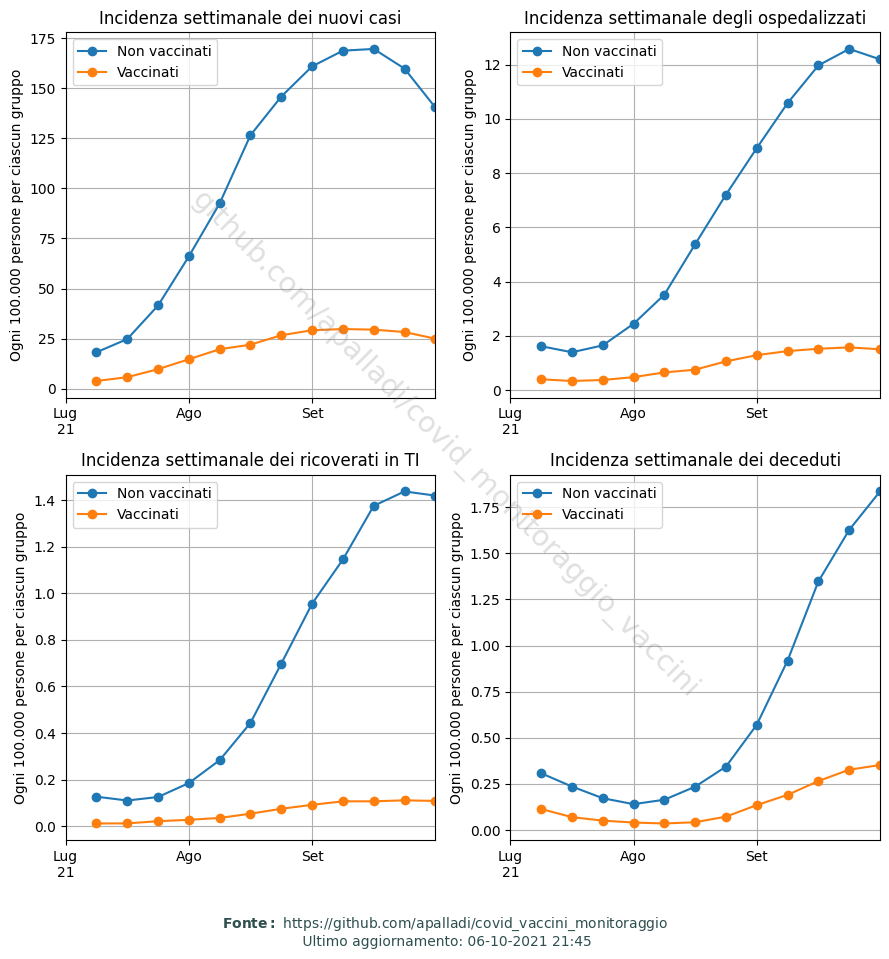

In [6]:
x_date = ['2021-07-01', '2021-08-01', '2021-09-01']
x_label = ['Lug\n21', 'Ago', 'Set']

update_labels()

fig, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

# unpack all the axes subplots
axes = axes2.ravel()

df_tassi.iloc[:, [0, 1]].plot(ax=axes[0], marker='o')
axes[0].set_title('Incidenza settimanale dei nuovi casi')
axes[0].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
which_axe(0)

df_tassi.iloc[:, [2, 3]].plot(ax=axes[1], marker='o')
axes[1].set_title('Incidenza settimanale degli ospedalizzati')
axes[1].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
which_axe(1)

df_tassi.iloc[:, [4, 5]].plot(ax=axes[2], marker='o')
axes[2].set_title('Incidenza settimanale dei ricoverati in TI')
axes[2].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
which_axe(2)

df_tassi.iloc[:, [6, 7]].plot(ax=axes[3], marker='o')
axes[3].set_title('Incidenza settimanale dei deceduti')
axes[3].set_ylabel('Ogni 100.000 persone per ciascun gruppo')
which_axe(3)

# add watermarks
ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())

plt.tight_layout()
plt.savefig('../risultati/andamento_epidemia.png', dpi=300, bbox_inches="tight")
plt.show()

### Rapporto fra tassi

watermark fontsize: 13, angle:-39.81


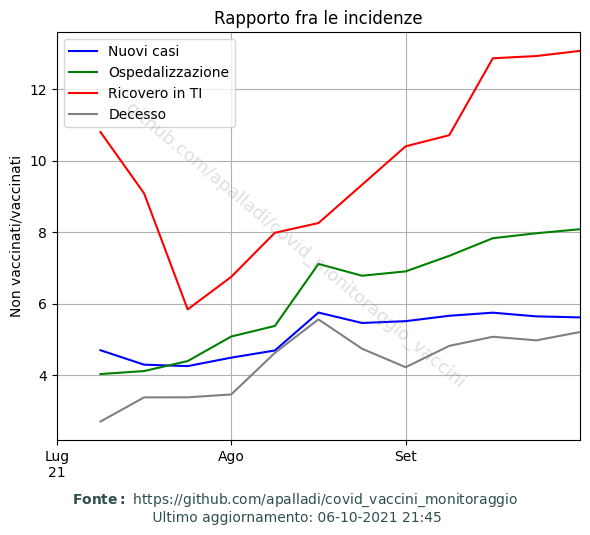

In [7]:
fig = plt.figure(figsize=(6, 5))
(df_tassi.iloc[:, 0]/df_tassi.iloc[:, 1]).plot(label='Nuovi casi', color='blue')
(df_tassi.iloc[:, 2]/df_tassi.iloc[:, 3]).plot(label='Ospedalizzazione', color='green')
(df_tassi.iloc[:, 4]/df_tassi.iloc[:, 5]).plot(label='Ricovero in TI', color='red')
(df_tassi.iloc[:, 6]/df_tassi.iloc[:, 7]).plot(label='Decesso', color='gray')
plt.title('Rapporto fra le incidenze')
plt.legend()
plt.xticks(x_date, x_label)
plt.minorticks_off()
plt.xlabel('')
plt.ylabel('Non vaccinati/vaccinati')
plt.grid()

# add watermarks
ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())

plt.tight_layout()
plt.savefig('../risultati/rapporto_tra_tassi.png', dpi=300, bbox_inches="tight")
plt.show()

### Andamento dei numeri assoluti

watermark fontsize: 21, angle:-45.0


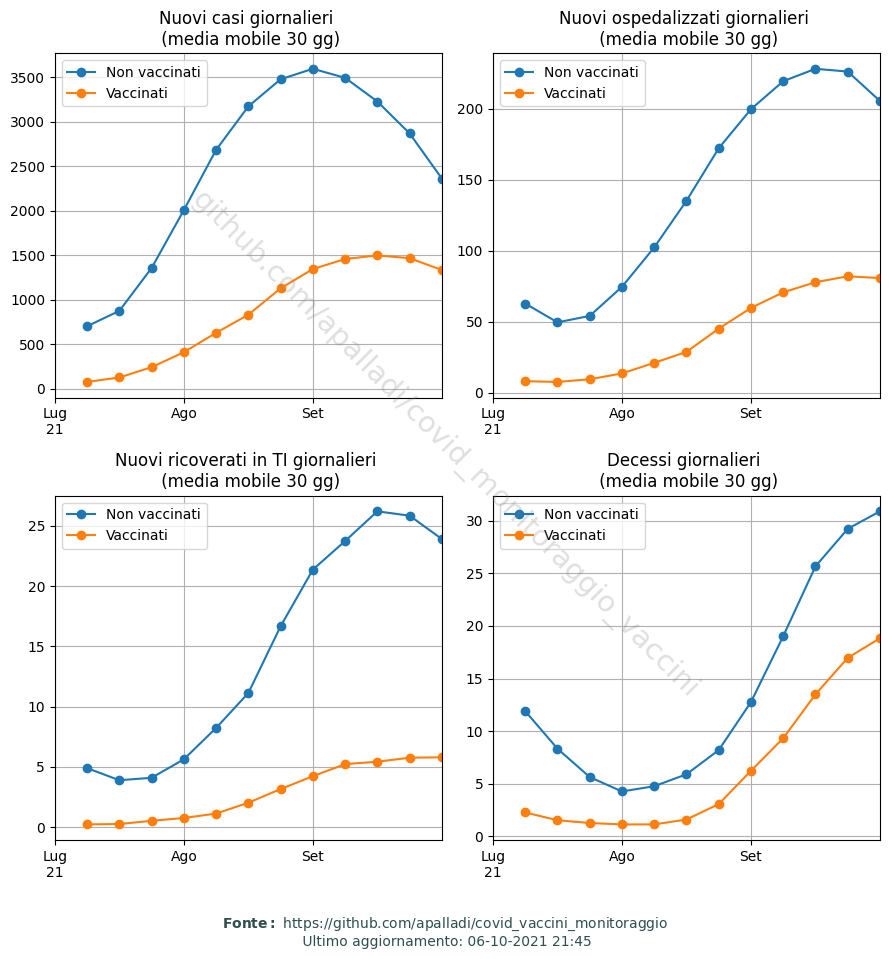

In [8]:
fig, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

# unpack all the axes subplots
axes = axes2.ravel()

df_assoluti2.iloc[:, [2, 3]].plot(ax=axes[0], marker='o')
axes[0].set_title('Nuovi casi giornalieri \n (media mobile 30 gg)')
which_axe(0)

df_assoluti2.iloc[:, [4, 5]].plot(ax=axes[1], marker='o')
axes[1].set_title('Nuovi ospedalizzati giornalieri \n (media mobile 30 gg)')
which_axe(1)

df_assoluti2.iloc[:, [6, 7]].plot(ax=axes[2], marker='o')
axes[2].set_title('Nuovi ricoverati in TI giornalieri \n (media mobile 30 gg)')
which_axe(2)

df_assoluti2.iloc[:, [8, 9]].plot(ax=axes[3], marker='o')
axes[3].set_title('Decessi giornalieri \n (media mobile 30 gg)')
which_axe(3)

# add watermarks
ax = plt.gca()
add_watermark(fig, ax.xaxis.label.get_fontsize())

plt.tight_layout()
plt.savefig('../risultati/andamento_epidemia_num_assoluti.png', dpi=300, bbox_inches="tight")
plt.show()